# Graphs with Python

### Step 1: Get the Data

It's in the CSV over there! Use the `pandas` library to load it into something we can read.

In [1]:
%matplotlib inline
import pandas as pd
# Source: NOAA/USGS
frame = pd.read_csv("weather_data.csv", parse_dates=[0])
frame.columns

Index(['DATE', 'PRECIP (inches)', 'DISCHARGE (cubic feet/sec)'], dtype='object')

The columns tell us how the data is organized. More complex file formats (such as NetCDF, MSEED, and others) will include more information about who owns the data, how it was collected, etc. But for this short demo, we only care about the numbers.

Another neat trick is to use `data.head` to see the topmost rows of the data file.

In [2]:
frame.head()

,DATE,PRECIP (inches),DISCHARGE (cubic feet/sec)
0,2019-01-01,0.09,44600.0
1,2019-01-02,0.00,40000.0
2,2019-01-03,0.00,30400.0
3,2019-01-04,0.00,27800.0
4,2019-01-05,0.95,32300.0


The numbers on the left tell us what row we are looking at. Be careful to not mix it up with the `DATE` column!

### Step 2: Plot the Data
`Matplotlib` is a very commonly used package for making graphs in python. This package actually replicates many of the functions in Matlab, another very common tool used by data scientists. There are also many other online graphing tools such as plotly, but we may not get to those today.

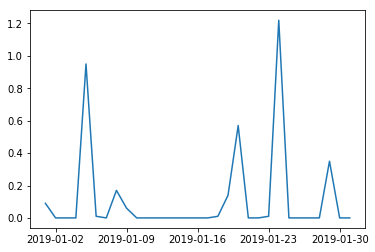

In [3]:
from matplotlib import pyplot as plt
plt.plot(frame["DATE"], frame["PRECIP (inches)"])

Kind've ugly, isn't it? What about titles and labels?

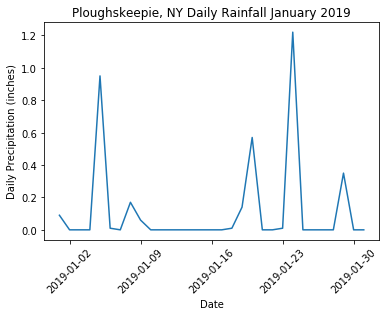

In [4]:
plt.xlabel("Date")
plt.ylabel("Daily Precipitation (inches)")
plt.title("Ploughskeepie, NY Daily Rainfall January 2019")
plt.xticks(rotation=45)
plt.plot(frame["DATE"], frame["PRECIP (inches)"])

That's a little better, but can we make look even better? Yes! Right now we are using `matplotlib`'s stock style setup. With a quick import we can get some fancier defaults.

In [5]:
from matplotlib import style
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

To use a particular style, simply type `style.use("STYLE_NAME_IN_QUOTES")`

In [6]:
style.use("fivethirtyeight")

We will also put our graph in a function so we can quickly call it.

In [8]:
def plot_data():
    plt.xlabel("Date")
    plt.ylabel("Daily Precipitation (inches)")
    plt.title("Ploughskeepie, NY Daily Rainfall January 2019")
    plt.xticks(rotation=45)
    plt.plot(frame["DATE"], frame["PRECIP (inches)"])

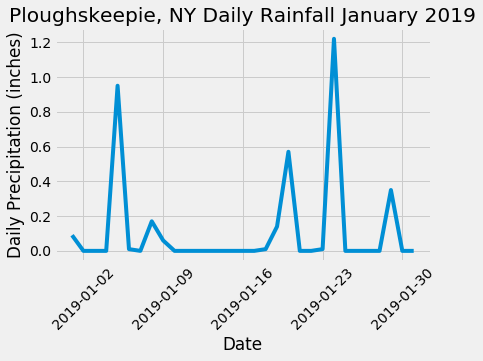

In [9]:
# change me! 
style.use("fivethirtyeight")
plot_data()

See which style you like best! Even little things like the color of a line can make a big difference in how quickly people can understand what you are trying to show them.

### Step 3: Analyze the Data
We haven't touched the `DISCHARGE` column in our data yet. One thing environmental scientists watch for is called lag time. Lag time is the amount of time it takes for the rain from a storm to get into local rivers. The time it takes for rain to drip through soil, storm drains, etc. makes up lag time.

![alt-text](https://www.researchgate.net/profile/Philippe_Gourbesville/publication/273410495/figure/fig1/AS:391939418542080@1470457047278/Lag-time-is-defined-as-the-time-interval-from-the-central-peak-of-rainfalls-shown-in.png)

If we can plot the rainfall and discharge together for Ploughskeepie, then we can determine the lag time!

To do so, we have to combine the rainfall and discharge data together. The `zip` function can do that for us. If you don't totally understand what's going on, don't worry!

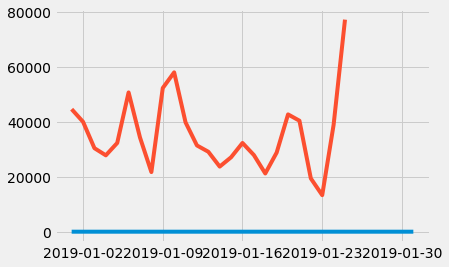

In [9]:
together = list(zip(frame["PRECIP (inches)"], frame["DISCHARGE (cubic feet/sec)"]))
plt.plot(frame["DATE"], together)

Oh no! When the two variables are put together, `DISCHARGE` is so much larger than `PRECIP` that we can hardly tell what's going on! For our data to make sense, we need to have two _different scales_. For this, we have to do something a little fancier with `matplotlib`

In [10]:
def plot_both():
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.plot(frame["DATE"], frame["PRECIP (inches)"], 'b-')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Precipitation (inches)", color='#4e88e5')
    ax1.tick_params('y', colors='#4e88e5')
    ax1.tick_params('x', rotation=45)
    #ax1.set_title("Hudson River Discharge vs. Precipitation, Ploughskeepie, NY Jan 2019")

    ax2 = ax1.twinx() # duplicates the axes so the two variables plot on the same figure (but with different scales)
    ax2.plot(frame["DATE"], frame["DISCHARGE (cubic feet/sec)"], 'r-')
    ax2.set_ylabel("Discharge (cubic feet/sec)", color='#e57979')
    ax2.tick_params('y', colors='#e57979')
    plt.show()

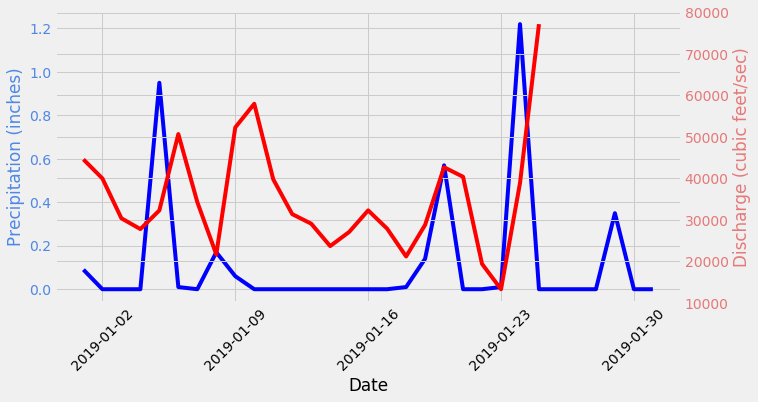

In [11]:
style.use("fivethirtyeight")
plot_both()